



# GRIP - THe Spark Foundation
### Wasim Alam
## Task No. 1
![alt text](1533219594764.jpg " Task No. 1: THe Spark Foundation")





## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Checking the number of rows and columns in the dataset respectively

s_data.shape

(25, 2)

In [4]:
# Checking if there are any null values present in the dataset.Apparently,We see there are no null values present

s_data.isnull().transpose()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Hours,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Scores,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
#checking out the statistical data of numerical columns in the dataset.
s_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [6]:
#checking the datatypes of the dependent and independent variables
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Data Visualization


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

Text(0.5, 0, 'Hours')

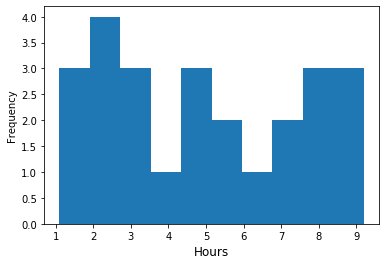

In [7]:
#I have plotted the histogram which depicts the average, maximum and minimum number of hours which are taken by the students to study!!
# The Distibution is kinda good.
plt.figure(figsize =(6,4))
s_data["Hours"].plot.hist(bins=10)
plt.xlabel("Hours",fontsize=12)

Text(0.5, 0, 'Scores')

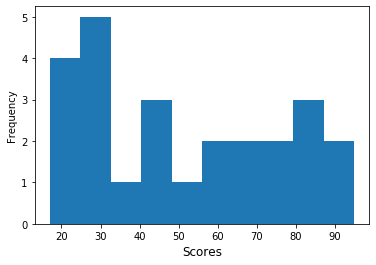

In [8]:

#This is the histogram plot which shows the average,maximum and minimum number of marks obtained by the students.
s_data["Scores"].plot.hist(bins=10)
plt.xlabel("Scores",fontsize=12)

<IPython.core.display.Javascript object>

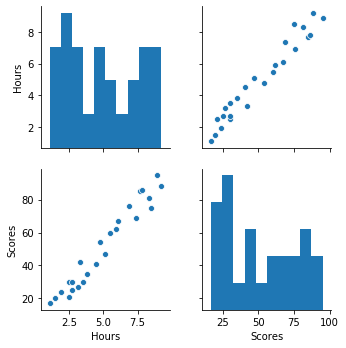

In [9]:

# making pairplot to see the relationship between the dependent and independent variables.
sns.pairplot(s_data)

In [10]:
# Scores obtained by most of the students and Hours taken by most of the students just to get an idea.
s_data.median()

Hours      4.8
Scores    47.0
dtype: float64

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:

#Here the independent variable is Hours and dependent variable is Scores.
X = np.array(s_data["Hours"])
y = np.array(s_data["Scores"])

In [12]:
#X = s_data.iloc[:, :-1].values  
#y = s_data.iloc[:, 1].values  

In [13]:
#Checking the shape of the variables

X.shape, y.shape

((25,), (25,))

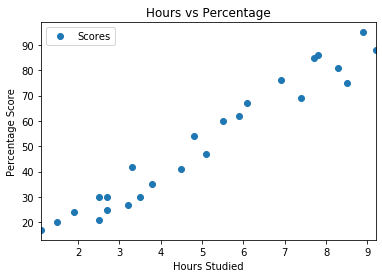

In [14]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [16]:
X_train = X_train.reshape(-1,1)

In [17]:
X_test = X_test.reshape(-1,1)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [18]:
from sklearn.linear_model import LinearRegression   #Importing LinearRegression from sklearn

#Making the instance of LinearRegression by calling LinearRegression() keeping parameters as default.
regressor = LinearRegression()  

# By fitting the data,the model will be trained according to the relation the independent and dependent variables are having with each other
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [19]:
#Predicting the values from the regression model based on training data(seen) first.
predict_y_train = regressor.predict(X_train)
predict_y_train.shape

(20,)

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [20]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [23]:
#Checking the accuracy of the model on the test set
regressor.score(X_test,y_test)

0.9454906892105356

In [24]:
# Getting the dataframe for the comparsion of the predicted train value and actual train values.(seen data)...Curiosity

new = pd.DataFrame({'Actual_Score_train' : y_train,'prediced_Score_train': predict_y_train}).transpose()
new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Actual_Score_train,35.000000,24.000000,86.000000,76.00000,17.000000,47.000000,85.000000,42.000000,81.000000,88.0000,67.000000,30.000000,25.000000,60.000000,30.000000,75.00000,21.000000,54.000000,95.000000,41.000000
prediced_Score_train,39.678655,20.848407,79.321281,70.40169,12.919882,52.562508,78.330215,34.723326,84.276609,93.1962,62.473165,36.705458,28.776933,56.526771,28.776933,86.25874,26.794801,49.589311,90.223003,46.616114


# Comparsion of the predicted test values with actual test values

In [25]:
# Getting the dataframe for the comparsion of the predicted test value and actual test values.(unseen data)

new = pd.DataFrame({'test_Actual_Score' : y_test,'test_prediced_Score': y_pred})
new

,test_Actual_Score,test_prediced_Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Visualization of results

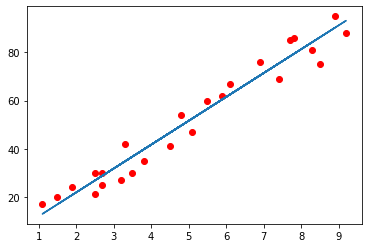

In [26]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color='red')
plt.plot(X, line);
plt.show()

# Predicting the Scores/Marks if any new value of Hour is given

In [27]:
x = float(input("Enter the number of hours, a student study for the exam   : "))
print("Student obtain {} marks(approx) by studying {} Hours".format(regressor.predict([[x]]),x))

Enter the number of hours, a student study for the exam   : 4.2
Student obtain [43.64291726] marks(approx) by studying 4.2 Hours


![alt text](thank-you-from-christian-vision-alliance.jpg " Task No. 1: THe Spark Foundation")